## Q1 K-Means

Implement K-Means Clustering on the dataset at the following location :  https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

You are expected to do all necessary EDA, feature scaling and transforms.

First, arbitarily choose cluster value as 2. Then use the elbow method which was discussed in class to identify the best number of cluster. While exploring this, if you observe the need to consider inertia as a factor, do so with proper rationale.

Write a brief explanation as to how PCA can help with clustering in this example.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv', index_col=0)
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [4]:
# Since all Columns 1-4 are empty
df.drop(df.columns[df.isna().sum() > 0],axis=1, inplace=True)

In [5]:
# Since date values are not useful for clustering
df.drop(columns=['status_published'], axis=1, inplace=True)

In [6]:
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [7]:
# Dropping categorical column status type (Since there is no distance betweeen nominal values like 'photo' and 'video')
df.drop('status_type', axis=1, inplace=True)
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,
1,529,512,262,432,92,3,1,1,0
2,150,0,0,150,0,0,0,0,0
3,227,236,57,204,21,1,1,0,0
4,111,0,0,111,0,0,0,0,0
5,213,0,0,204,9,0,0,0,0


In [8]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [9]:
# Performing Min Max Scaling to make prevent exponential distance growth
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
df = pd.DataFrame(X, columns=[df.columns])
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [10]:
from sklearn.cluster import KMeans

In [11]:
inertias = []
for cl in list(range(1,10,1)):
    km_model = KMeans(n_clusters=cl, init='k-means++')
    km_model.fit_predict(df)
    inertias.append(km_model.inertia_)

inertia_df = pd.DataFrame({'n_clusters': list(range(1,10,1)),'inertias': inertias})

<AxesSubplot:xlabel='n_clusters'>

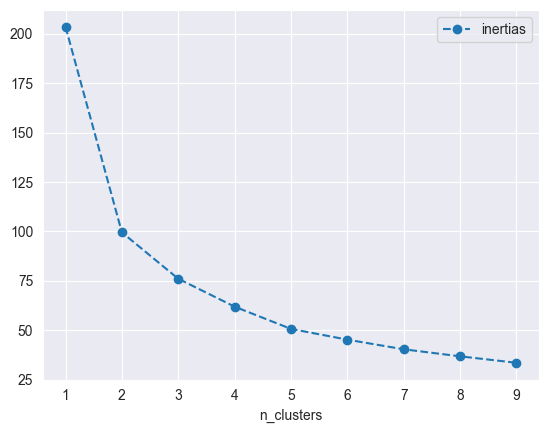

In [12]:
inertia_df.plot(y='inertias', x='n_clusters', style='o--')

### Analysis:
Since, the loss seems to be flattening after the value of n_clusters=4 so we can choose the number of clusters as 4.

In [13]:
km_model = KMeans(n_clusters=4, init='k-means++')
km_model.fit(df)
print("Inertia:", km_model.inertia_)
print("Cluster Centroids:", km_model.cluster_centers_)

Inertia: 61.88911219125037
Cluster Centroids: [[1.38521326e-02 1.21457658e-03 1.57210047e-03 1.33658963e-02
  2.58353218e-03 1.15270964e-03 9.71447030e-04 1.78849173e-03
  8.62931691e-04]
 [4.07716855e-01 2.99382379e-03 4.45385514e-03 4.06490932e-01
  4.74042288e-03 8.68943399e-03 1.26621134e-03 7.67776990e-04
  1.94325690e-04]
 [8.35418844e-02 4.02401803e-02 3.94061414e-02 7.35641660e-02
  6.37437401e-02 6.99555772e-03 1.30381588e-02 1.51140423e-02
  1.11427280e-02]
 [2.71955379e-01 1.55836503e-01 2.02174621e-01 2.11007274e-01
  3.58884148e-01 1.23953296e-01 8.04009606e-02 4.48408872e-02
  6.16076150e-02]]


### How can PCA help here?

PCA can help in clustering by reducing the noise and mapping the data to its eigenvalues which are the dimensions along which the data has highest variance. Hence, we may obtain our results faster (since the number of dimensions is reduced) and better clusters if we apply PCA before KMeans.

In [14]:
from sklearn.decomposition import PCA

model = PCA(n_components=4)
X_pca = model.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=[1,2,3,4])
print("Explained Variance Ratio:", np.sum(model.explained_variance_ratio_))
df_pca.head()

Explained Variance Ratio: 0.9363382998788553


,1,2,3,4
0,0.102166,0.108707,-0.024445,0.003617
1,-0.026744,-0.021502,-0.001840,-0.001408
2,0.000206,0.011211,-0.004789,-0.005480
3,-0.038197,-0.019096,-0.002186,-0.001322
4,-0.007369,-0.015080,-0.006273,-0.001353


<AxesSubplot:xlabel='n_clusters'>

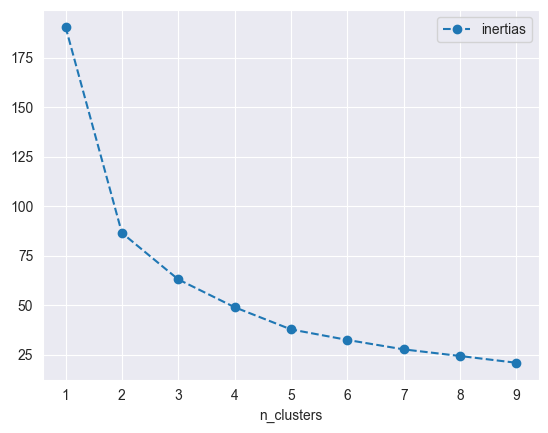

In [15]:
inertias = []
for cl in list(range(1,10,1)):
    km_model = KMeans(n_clusters=cl, init='k-means++')
    km_model.fit_predict(df_pca)
    inertias.append(km_model.inertia_)

inertia_df = pd.DataFrame({'n_clusters': list(range(1,10,1)),'inertias': inertias})
inertia_df.plot(y='inertias', x='n_clusters', style='o--')

### Final PCA Analysis:
We can see here that the same clusters can be obtained by using only 4 principal copmponents since they explain almost 94% of the variance in the data. Hence, these 4 components can be used to perform clustering which gives similar results and is also faster since we are working with reduced number of dimensions.

## Q2 Loss Functions

Let the desired output to 10 inputs be,

> [0,1,0,0,1,0,0,1,1,1]


and let the corresponding actual output obtained from a machine be 


> [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


Find programmatically or by hand the loss obtained from using:

1.   a symmetric 0 − 1 loss function,

2.   the cross-entropy loss function and

3.   the hinge loss function.

If required assume a threshold of 0.5 to obtain a class from the machine output.  (sklearn by default uses 0.5 as threshold for binary classification) 

In [16]:
output = np.array([0,1,0,0,1,0,0,1,1,1])
predicted = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [17]:
# 0-1 Symmetric loss function gives 1 if y = f(x) and 0 if y != f(x)
temp = 0
for i in range(len(output)):
    if output[i] != (predicted[i] > 0.5):     # Considering a threshold value of 0.5 for correct prediction
        temp += 1

loss_sym = temp / len(output)
print("Symmetric 0-1 loss using threshold of 0.5 : {:.2f}".format(loss_sym))

Symmetric 0-1 loss using threshold of 0.5 : 0.50


In [18]:
# Binary cross entropy loss is defined as L = -p*(log p) - (1-p)*(log(1-p))
N = len(predicted)
loss_ben = (-np.sum(np.log(predicted)*output )- np.sum(np.log(1- predicted)*(1-output)))/N

print("Cross Entropy loss : {:.2f}".format(loss_ben))

Cross Entropy loss : 0.92


In [20]:
# Hinge loss is defined as L = max(0, 1-z); where z = y*f(x)
output = np.array([-1,1,-1,-1,1,-1,-1,1,1,1])
N = len(predicted)
loss_hinge = np.sum(np.maximum(0, (1 - predicted*output)))/N
    
print("Hinge loss : {:.2f}".format(loss_hinge))

Hinge loss : 1.00
